<a href="https://colab.research.google.com/github/Aashrit77/Python/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
array = df.values

In [4]:
x = array[:,0:8]
y = array[:,8]
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7565276828434724


we always build the algo for each k values and find the largest the accuracy and take that as the k-value but to do this for each data point is a long process hence we have a quicker process to do so:
#Grid Search for algorithm tuning

In [5]:
from sklearn.model_selection import GridSearchCV

In [12]:
k_values = np.array(range(1,40))
param_grind = dict(n_neighbors= k_values)

In [13]:
param_grind 

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [14]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grind)
grid.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
print(grid.best_score_)
print(grid.best_params_)
#so this is the best k value e are supposed to take

0.7578558696205755
{'n_neighbors': 14}


#TO Visualize the CV result

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

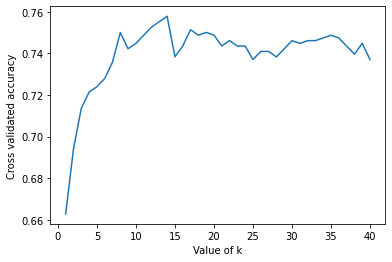

In [19]:
k_range = range(1,41)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x,y,cv=5)
  k_scores.append(scores.mean())

#plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel("Value of k")
plt.ylabel("Cross validated accuracy")
plt.show()